In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("hlmsjstN6Aw")

# We're not saying "no" to Pandas, but first...
* Connect to a Postgres server 
    * in python 
        * using psycopg2
* Understand psycopg2's "cursors"
    * executes
    * commits
* Generate dynamic queries

# psycopg2 is a python/postgreSQL server interface

In [ ]:
# install homebrew: http://brew.sh

# brew cask install postgres -> double click -> applications
### not needed ### brew cask install pgadmin4 -> double click -> applications, click plug
# brew tap homebrew/services
# brew services start postgresql

# https://github.com/zipfian/welcome/blob/master/notes/postgres_setup.md

# conda install psycopg2
import psycopg2

In [ ]:
# https://github.com/zipfian/precourse/tree/master/Chapter_3_SQL/data
# psql -f stuff/beds.sql

# Step 1: open a connection

In [ ]:
# ALTER USER schwarls37 ENCRYPTED PASSWORD 'need a password';

conn = psycopg2.connect(dbname='schwarls37',port=5432,password="",
                        user='schwarls37',host='localhost')

# host could be a remote database as well

<table align="center">
<tr>
<td><img src="stuff/whywouldyoudothat1.jpg" width="300px" align="center"></td> 
<td><img src="stuff/whywouldyoudothat2.jpg" width="415px" align="center"></td> 
</tr>
</table>
<table align="center">
<tr>
<td><img src="stuff/whywouldyoudothat3.jpg" width="400px" align="center"></td> 
<td><img src="stuff/whywouldyoudothat4.jpg" width="305px" align="center"></td> 
</tr>
</table>

## Allows us to combine data sources in one place
* Can use python to simultaneously pull data from other databases as well 
    * mysql-connector-python (MySql)
    * sqlite (SQLite)
    * pymongo (MongoDB)
    * sqlalchemy (all the things)
    * [psychopg2 (postgreSQL), obviously]

## Allows us to bring other python tools to bear
* DataFrames and associated functionality, Machine Learning tools, etc.

## Allows for easy dynamic query generation
* And hence, automation

# Step 2: create a cursor object

In [ ]:
cur = conn.cursor()
#cur.close()

# The cursor interfaces and traverses the database 
# We don't have to worry about how it does it
# Queries are returned as (single iteration) generators 

# Step 3: execute some SQL queries

In [ ]:
query = '''SELECT "facility_name", "available_residential_beds" 
           FROM Beds 
           WHERE "city" = 'Cuba' 
           LIMIT 10;'''

cur.execute(query)

In [ ]:
# If you see this error 

print "InternalError: current transaction is aborted, commands ignored until end of transaction block"

# Then the cursor is chocking on a current command 
# and it needs to be aborted with: conn.rollback()

In [ ]:
for row in cur:
    print row

In [ ]:
for row in cur:
    print row
    
# See, I told you: cur saves results as a (one pass) generator    

In [ ]:
# Other options for iterating through the generator

# cur.fetchone(), or cur.next()
# cur.fetchmany(n)
# cur.fetchall()

In [ ]:
query = '''ALTER TABLE Beds 
           RENAME COLUMN "available_residential_beds" 
           TO "Available Residential Beds"'''

cur.execute(query)

# Step 4: commit SQL actions 
### (to actually make the changes to the DB permanent)

In [ ]:
conn.commit()
# conn.autocommit = True

# database level operations are also available

In [ ]:
query = '''ALTER TABLE Beds 
           RENAME COLUMN "Available Residential Beds" 
           TO "available_residential_beds"'''
cur.execute(query)
conn.commit()

# $$\textbf{"Sanitize yo' queries, foo'!"}$$

<table align="center">
<tr><td>
<img src="stuff/exploits_of_a_mom.png" width="600px" align="center"> 
</tr></td>
</table>

# $$\textbf{"I pity the foo'!"}$$

In [ ]:
my_name = "Scott"
unsafe_query = '''SELECT * FROM Users 
                  WHERE Name = ''' + my_name

# what if...
my_name = "Scott; DROP TABLE Users"

# This is called SQL Injection and it's obviously risky

In [ ]:
# Instead 
my_name = "Scott; DROP TABLE Users"

cur.execute('''SELECT * FROM Users WHERE Name = %s''', my_name)

# will search for rows in Name *exactly* equal to 'Scott; DROP TABLE Users'

# Step 5: close the connection

In [ ]:
cur.close() # optional, automatically close with conn.close()
conn.close()

In [ ]:
# Or... 

# just read directly into a pandas data frame... which we shall begin learning about: now.

conn = psycopg2.connect(dbname='schwarls37',port=5432,password="",
                        user='schwarls37',host='localhost')


import pandas as pd
query = '''SELECT "facility_name", "available_residential_beds" 
           FROM Beds 
           WHERE "city" = 'Cuba' 
           LIMIT 10;'''
rows = pd.read_sql_query(query, conn)
conn.close()

rows

# $$\textit{pandas}$$
$$\text{Schwartz}$$

## $$\textbf{They're not on the endangered species list any more}$$
# $$\textbf{How China saved the Giant Panda}$$

As of September 2016 the International Union for the Conservation of Nature (IUCN) has taken the global icon off the endangered species list. The giant panda is now listed as "vulnerable" as opposed to "endangered". Thanks to Chinese conservation efforts the Giant Panda population has increased to approximately 2,000 individuals up from a low of about 1,000 in the 1970's when the species was at the most risk.  This population increase has been the result of bamboo forest restoration projects and the incorporation of improved captive breeding and husbandry methods -- initiatives driven by a better understanding of Giant Panda physiology and behaviour. Challenges remain, however. Climate change is predicted to wipe out more than one-third of the panda's bamboo habitat in the next 80 years, and reintroduction of captive-bred pandas into the wild remains challenging. 

<table align="center">
<tr><td>
<img src="stuff/pandas.png" width="600px" align="center"> 
</tr></td>
</table>

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("RDrfE9I8_hs")


# QUIZ

* 1:
* 2:
* 3:
* 4:
* 5:
* Bonus #1:
* Bonus #2:


# Pandas are cute cuddly animals
* They are also the Flying Circus' answer to Excel and R Data Frames
* They are built on top of NumPy NdArrays
* http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

# Objectives
* psycopg2
* numpy
    * Speed
    * Broadcasting
* Pandas Series
    * Pandas Time Series Type
* Pandas DataFrames
    * Creating and destroying columns
    * Merging/Joining DataFrames
    * Concatenating/Appening DataFrames
    * Sorting
    * Accessing data
    * Manipulating the DataFrame Index    
* Exploratory Data Analysis (EDA) with Matplotlib and Pandas 
    * Grouping/Aggregation
    * Creating pivot tables
    * Applying functions/plotting

# Pandas is very functional

<table align="center">
<tr>
<td><img src="stuff/panda7.jpg" width="300px" align="center"></td> 
<td><img src="stuff/panda2.jpg" width="180px" align="center"></td> 
<td><img src="stuff/panda6.jpg" width="475px" align="center"></td> 
<tr><td>Killer Panda</td><td>Red Handed Panda</td><td>Sexy Panda</td></tr>


</tr>
</table>
<table align="center">
<tr>

<td><img src="stuff/panda4.jpg" width="230px" align="center"></td> 
<td><img src="stuff/panda3.jpg" width="300px" align="center"></td> 
<td><img src="stuff/panda1.jpg" width="205x" align="center"></td> 
<td><img src="stuff/panda8.jpg" width="210px" align="center"></td> 
<tr><td>Ranch Hand Panda</td><td>Assisted Pushup Panda</td><td>Acrobat Panda (Beginner)</td><td>Acrobat Panda (Advanced)</td></tr>
</tr>
</table>

# (Standard Library) Lists
* concatenate

In [1]:
[1,2,3] + [4,5,6]

[1, 2, 3, 4, 5, 6]

# Numpy NdArrays
* operate elementwise

In [3]:
import numpy as np

In [4]:
np.array([1,2,3]) + np.arange(3) + np.linspace(10,12,3)

array([ 11.,  14.,  17.])

# Numpy NdArrays

* have types

In [5]:
ints = np.array(range(3))
chars = np.array(list('ABC'))
strings = np.array(['A','BC',"DEF"])

print ints.dtype, chars.dtype, strings.dtype

int64 |S1 |S3


# Speed

https://ipython.org/ipython-doc/3/interactive/magics.html

In [6]:
numpy_array = np.arange(0, 1000000)
python_list = range(1000000)

print "python list"
time = %timeit -r 1 -o sum(python_list)
print time.all_runs[0]/time.loops 

print "\n" + "numpy array"
time = %timeit -r 1 -o np.sum(numpy_array)
print time.all_runs[0]/time.loops

print "\n" + "numpy array -- standard library sum"
time = %timeit -r 1 -o sum(numpy_array)
print time.all_runs[0]/time.loops

python list
100 loops, best of 1: 12.2 ms per loop
0.0121877813339

numpy array
1000 loops, best of 1: 1.34 ms per loop
0.00133687806129

numpy array -- standard library sum
10 loops, best of 1: 139 ms per loop
0.139155602455


# Broadcasting

http://docs.scipy.org/doc/numpy-1.10.1/user/basics.broadcasting.html

In [7]:
a = np.array([[10], [-10]]) 
b = np.array([[1, 2], [-1, -2]]) 

print a.shape, b.shape 
print "\n"
print a + b

# elements will "duplicate, expand, and fill up" 
# to make the dimensions compatible for element-wise operations
# cool.

(2, 1) (2, 2)


[[ 11  12]
 [-11 -12]]


In [8]:
a = np.array([[10, 0, -10, 0],[-10, 0, -10, 0]]) 
b = np.array([[2,2],[-1,-1]]) 
print a.shape, b.shape 
print ""
print a + b

# it's not clear how it should fill up in this case... so it can't/doesn't

(2, 4) (2, 2)



ValueError: operands could not be broadcast together with shapes (2,4) (2,2) 

# Dimension Dimentia...

In [20]:
a = 10
#a = np.array(10)
#a = np.array([10])
#a = np.array([[[10]]])
#a = np.array([[10],[10]])
b = np.array([[1,2],[-1,-2]])

print a.shape, b.shape
print "\n"
print a + b

(2, 1) (2, 2)


[[11 12]
 [ 9  8]]


In [ ]:
# Notes:

# a.shape can be assigned into to change the shape with compatible shapes
# a.reshape() can be used to change shape as well to compatible shapes 

# see also a.flatten() and a.ravel(), which leads us to the following... 

# Aliasing Amnesia... 
* *Copy* versus *View* (and not accidentally editing another variables memory)


In [22]:
z = [1, 2]
zz = z#[:]
zz[0]=11
z

[11, 2]

In [24]:
b = np.array([[1,2],[-1,-2]])
print b
print ""

c = b#[:]#.copy()
# also see "deepcopy()"
c[0,0]=666

print c
print ""
print b

[[ 1  2]
 [-1 -2]]

[[666   2]
 [ -1  -2]]

[[666   2]
 [ -1  -2]]


# Pandas Series
* are (one dimensional) np.ndarray vectors **with an index**


In [25]:
import pandas as pd

In [26]:
series = pd.Series([5775,373,7,42,np.nan,33])
print series
print "\n"
print series.shape

0    5775.0
1     373.0
2       7.0
3      42.0
4       NaN
5      33.0
dtype: float64


(6,)


In [27]:
world_series = pd.Series(["cubs","royals","giants","sox","giants","cards","giants","...",None])
world_series

0      cubs
1    royals
2    giants
3       sox
4    giants
5     cards
6    giants
7       ...
8      None
dtype: object

# Pandas Date Series
* are fancy: http://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [29]:
bdays = pd.date_range(start='19821107', periods=34+1, freq=pd.DateOffset(years=1))
bdays.shape

(35,)

### After you learn Pandas you might care about using Date Series Types and the following could be useful:
* df = pd.read_csv(infile, parse_dates=['datetime'], date_parser=dateparse)
* df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x))



# Pandas DataFrames
* are a set of Pandas Series **that share the same index** 
<br>
<br>

$$\large \text{Python List} \subset \text{NumPy Array} \subset \text{Pandas Series} \subset \text{Pandas DataFrame}$$
<br>

In [30]:
mixedTypes_df = pd.DataFrame({ '0' : [np.nan] + 3 * [1.],
                               'b' : pd.Timestamp('20130102'),
                               'C' : pd.Series(3, index=list(range(4)), dtype='float32'),
                               '1' : np.array(4 * [1], dtype='int32'),
                                2  : pd.Categorical(["train", "test", "validate", "win"]),
                                3 : 2*[np.nan, 'foo'] }) #, index=bdays[:4]
print mixedTypes_df
print ""
print mixedTypes_df.shape
print ""
mixedTypes_df.dtypes

          2    3    0  1    C          b
0     train  NaN  NaN  1  3.0 2013-01-02
1      test  foo  1.0  1  3.0 2013-01-02
2  validate  NaN  1.0  1  3.0 2013-01-02
3       win  foo  1.0  1  3.0 2013-01-02

(4, 6)



2          category
3            object
0           float64
1             int32
C           float32
b    datetime64[ns]
dtype: object

# Managing Columns

In [31]:
mixedTypes_df.rename(columns={'b': 'B'}, inplace=True)
mixedTypes_df

,2,3,0,1,C,B
0,train,NaN,NaN,1,3.0,2013-01-02
1,test,foo,1.0,1,3.0,2013-01-02
2,validate,NaN,1.0,1,3.0,2013-01-02
3,win,foo,1.0,1,3.0,2013-01-02


In [32]:
mixedTypes_df['1']

0    1
1    1
2    1
3    1
Name: 1, dtype: int32

In [33]:
type(mixedTypes_df['1'])

pandas.core.series.Series

In [34]:
del mixedTypes_df['1']
mixedTypes_df

,2,3,0,C,B
0,train,NaN,NaN,3.0,2013-01-02
1,test,foo,1.0,3.0,2013-01-02
2,validate,NaN,1.0,3.0,2013-01-02
3,win,foo,1.0,3.0,2013-01-02


In [35]:
mixedTypes_augmented_df = mixedTypes_df.copy() # de-referencing

mixedTypes_df.index = bdays[:4]

mixedTypes_augmented_df[2] = mixedTypes_augmented_df[2] + np.array([", I"]*4) # element-wise
mixedTypes_augmented_df[2] = mixedTypes_augmented_df[2] + " must" # broadcasting
mixedTypes_augmented_df['G'] = 'hommies' # broadcasting

print "mixedTypes_df"
print mixedTypes_df
print "\n"+"mixedTypes_augmented_df"
print mixedTypes_augmented_df

mixedTypes_df
                   2    3    0    C          B
1982-11-07     train  NaN  NaN  3.0 2013-01-02
1983-11-07      test  foo  1.0  3.0 2013-01-02
1984-11-07  validate  NaN  1.0  3.0 2013-01-02
1985-11-07       win  foo  1.0  3.0 2013-01-02

mixedTypes_augmented_df
                  2    3    0    C          B        G
0     train, I must  NaN  NaN  3.0 2013-01-02  hommies
1      test, I must  foo  1.0  3.0 2013-01-02  hommies
2  validate, I must  NaN  1.0  3.0 2013-01-02  hommies
3       win, I must  foo  1.0  3.0 2013-01-02  hommies


# Accessing Data
* is kind of special in Pandas

In [37]:
# getting columns
mixedTypes_augmented_df["G"]
mixedTypes_augmented_df.G
#.values
#tolist()

0    hommies
1    hommies
2    hommies
3    hommies
Name: G, dtype: object

In [41]:
print mixedTypes_df.index
print ""
print mixedTypes_df.index.values #.dtype # type(
print ""
print mixedTypes_df.index.tolist()

DatetimeIndex(['1982-11-07', '1983-11-07', '1984-11-07', '1985-11-07'], dtype='datetime64[ns]', freq='<DateOffset: kwds={'years': 1}>')

<type 'numpy.ndarray'>

[Timestamp('1982-11-07 00:00:00', offset='<DateOffset: kwds={'years': 1}>'), Timestamp('1983-11-07 00:00:00', offset='<DateOffset: kwds={'years': 1}>'), Timestamp('1984-11-07 00:00:00', offset='<DateOffset: kwds={'years': 1}>'), Timestamp('1985-11-07 00:00:00', offset='<DateOffset: kwds={'years': 1}>')]


In [ ]:
print mixedTypes_df.columns
print ""
print mixedTypes_df.columns.values #.dtype
print ""
print mixedTypes_df.columns.tolist()

In [42]:
np.ones((10,10))[:3,:3]

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [43]:
zeros_ndarray = np.zeros((3,4))        # Create a matrix of zeros with 3 rows and 4 columns. 
ones_ndarray = np.ones((10,20))        # Create a matrix of ones with 10 rows and 20 columns.
identity_ndarray = np.identity(50)     # Create an identity matrix with 50 rows and 50 columns. 
random_ndarray = np.random.rand(2, 2)  # Create a 2x2 array of random floats ranging from 0 to 1. 
range_ndarray = np.arange(0, 20, 0.5)  # Create a numpy array with arguments (start, end, step_size). 
noise_nparray = np.random.randn(35, 6) # Create a 35x6 array of normally distributed random normal variables

In [44]:
mixedTypes_df.head()
mixedTypes_df[:3,:3]
# is mixedTypes_df a matrix?

TypeError: unhashable type

In [46]:
print mixedTypes_df.values[:3,:3] 
# mixedTypes_df.as_matrix()

[['train' nan nan]
 ['test' 'foo' 1.0]
 ['validate' nan 1.0]]


array([['train', nan, nan, 3.0, Timestamp('2013-01-02 00:00:00')],
       ['test', 'foo', 1.0, 3.0, Timestamp('2013-01-02 00:00:00')],
       ['validate', nan, 1.0, 3.0, Timestamp('2013-01-02 00:00:00')],
       ['win', 'foo', 1.0, 3.0, Timestamp('2013-01-02 00:00:00')]], dtype=object)

In [47]:
# getting columns
mixedTypes_df[[2,3,"0","B"]]

,2,3,0,B
1982-11-07,train,NaN,NaN,2013-01-02
1983-11-07,test,foo,1.0,2013-01-02
1984-11-07,validate,NaN,1.0,2013-01-02
1985-11-07,win,foo,1.0,2013-01-02


In [52]:
# getting rows
print bdays[1]
mixedTypes_df[:bdays[1]] # hint: "slice"

1983-11-07 00:00:00


,2,3,0,C,B
1982-11-07,train,NaN,NaN,3.0,2013-01-02
1983-11-07,test,foo,1.0,3.0,2013-01-02


In [53]:
mixedTypes_df

,2,3,0,C,B
1982-11-07,train,NaN,NaN,3.0,2013-01-02
1983-11-07,test,foo,1.0,3.0,2013-01-02
1984-11-07,validate,NaN,1.0,3.0,2013-01-02
1985-11-07,win,foo,1.0,3.0,2013-01-02


In [54]:
# Quiz 1
#-------
mixedTypes_df[:1]
#mixedTypes_df[2:3]
#mixedTypes_df[[2,3]]
#mixedTypes_df[2]
#mixedTypes_df[1]
#mixedTypes_df[0]
#mixedTypes_df['0']

,2,3,0,C,B
1982-11-07,train,NaN,NaN,3.0,2013-01-02


In [55]:
mixedTypes_df = mixedTypes_df.reset_index()
mixedTypes_df

,index,2,3,0,C,B
0,1982-11-07,train,NaN,NaN,3.0,2013-01-02
1,1983-11-07,test,foo,1.0,3.0,2013-01-02
2,1984-11-07,validate,NaN,1.0,3.0,2013-01-02
3,1985-11-07,win,foo,1.0,3.0,2013-01-02


In [61]:
# Quiz 2
#-------

mixedTypes_df[:1]
#mixedTypes_df[2:3]
#mixedTypes_df[[2,3]]
#mixedTypes_df[2]
#mixedTypes_df[1]
#mixedTypes_df[0]
#mixedTypes_df['0']

,index,2,3,0,C,B
0,1982-11-07,train,NaN,NaN,3.0,2013-01-02


In [62]:
mixedTypes_df = mixedTypes_df.set_index('index')
del mixedTypes_df.index.name
mixedTypes_df

,2,3,0,C,B
1982-11-07,train,NaN,NaN,3.0,2013-01-02
1983-11-07,test,foo,1.0,3.0,2013-01-02
1984-11-07,validate,NaN,1.0,3.0,2013-01-02
1985-11-07,win,foo,1.0,3.0,2013-01-02


# The *.loc*

In [68]:
mixedTypes_df.loc[bdays[1]:bdays[3],["B","C"]]
#mixedTypes_df.loc[["B","C"]] # hint: ,
#mixedTypes_df.loc[:,["2","3"]] # hint: "
#mixedTypes_df.loc[:3,["B","C"]] # hint: bdays[3]

,B,C
1983-11-07,2013-01-02,3.0
1984-11-07,2013-01-02,3.0
1985-11-07,2013-01-02,3.0


# The *.iloc*
* as opposed to the *.loc*

In [71]:
#print mixedTypes_df.iloc[:bdays[3],["B","C"]]
print mixedTypes_df.iloc[2:4,2:4]

              0    C
1984-11-07  1.0  3.0
1985-11-07  1.0  3.0


# The *.ix*
* as opposed(?) to the *.loc* and the *.iloc*

In [72]:
mixedTypes_df

,2,3,0,C,B
1982-11-07,train,NaN,NaN,3.0,2013-01-02
1983-11-07,test,foo,1.0,3.0,2013-01-02
1984-11-07,validate,NaN,1.0,3.0,2013-01-02
1985-11-07,win,foo,1.0,3.0,2013-01-02


In [73]:
print mixedTypes_df.ix[:3,1:3]
print ""
print mixedTypes_df.ix[:bdays[3],1:3]
print ""
print mixedTypes_df.ix[:3,['B','C']]
print ""
print mixedTypes_df.ix[:bdays[3],[2,3]]

              3    0
1982-11-07  NaN  NaN
1983-11-07  foo  1.0
1984-11-07  NaN  1.0

              3    0
1982-11-07  NaN  NaN
1983-11-07  foo  1.0
1984-11-07  NaN  1.0
1985-11-07  foo  1.0

                    B    C
1982-11-07 2013-01-02  3.0
1983-11-07 2013-01-02  3.0
1984-11-07 2013-01-02  3.0

                   2    3
1982-11-07     train  NaN
1983-11-07      test  foo
1984-11-07  validate  NaN
1985-11-07       win  foo


# The *.at/.iat*?
* gets you a single scalar. fast.

# Pandas talks to all sorts of data types
## SQL, csv, .xlsx, pickle, etc.
* http://pandas.pydata.org/pandas-docs/stable/io.html
* https://docs.python.org/2/library/pickle.html

In [74]:
Schools_df = pd.read_csv("stuff/Schools.csv")
Schools_df.head()

,schoolID,schoolName,schoolCity,schoolState,schoolNick
0,abilchrist,Abilene Christian University,Abilene,TX,Wildcats
1,adelphi,Adelphi University,Garden City,NY,Panthers
2,adrianmi,Adrian College,Adrian,MI,Bulldogs
3,airforce,United States Air Force Academy,Colorado Springs,CO,Falcons
4,akron,University of Akron,Akron,OH,Zips


# Applying functions to Data
## A.K.A., transforming data, doing stuff to data, etc.
<br>
$$\LARGE \text{NumPy Array} \subset \text{Pandas Series} \subset \text{Pandas DataFrame}$$

* http://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics

# Filtering (i.e., row selecting or boolean indexing)

In [75]:
# & | ~ == != VERSUS and or not equals

Schools_df[(Schools_df.schoolState.isin(["TX"]) & Schools_df.schoolNick.str.contains("Tigers")) 
           | ((Schools_df.schoolCity.astype(str) == "Austin") & 
              (Schools_df["schoolName"].astype(str) != "University of Texas at Austin")) ]

,schoolID,schoolName,schoolCity,schoolState,schoolNick
131,concrdiatx,Concordia University at Austin,Austin,TX,Tornados
180,etxbaptist,East Texas Baptist University,Marshall,TX,Tigers
565,stedwardtx,St. Edward's University,Austin,TX,Hilltoppers
618,trinitytx,Trinity University,San Antonio,TX,Tigers
628,txsouth,Texas Southern University,Houston,TX,Tigers


In [76]:
kp = (Schools_df.schoolState.isin(["TX"]) & Schools_df.schoolNick.str.contains("Tigers")) | \
    ((Schools_df.schoolCity.astype(str) == "Austin") & ~(Schools_df.schoolName.astype(str) == "University of Texas at Austin"))

print Schools_df.ix[kp, ["schoolName","schoolNick"]]
print ""
print Schools_df.loc[kp, "schoolName":"schoolNick"]
print ""
print Schools_df.iloc[kp ,1:2]

                         schoolName   schoolNick
131  Concordia University at Austin     Tornados
180   East Texas Baptist University       Tigers
565         St. Edward's University  Hilltoppers
618              Trinity University       Tigers
628       Texas Southern University       Tigers

                         schoolName   schoolCity schoolState   schoolNick
131  Concordia University at Austin       Austin          TX     Tornados
180   East Texas Baptist University     Marshall          TX       Tigers
565         St. Edward's University       Austin          TX  Hilltoppers
618              Trinity University  San Antonio          TX       Tigers
628       Texas Southern University      Houston          TX       Tigers



NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [77]:
pd.DataFrame(Schools_df[Schools_df.schoolNick.notnull() & Schools_df.schoolState.isin(["TX"])].schoolNick.reshape(5,8))

,0,1,2,3,4,5,6,7
0,Wildcats,Kangaroos,Bears,Tornados,Patriots,Tigers,Cowboys,Huskies
1,Cougars,Yellow Jackets,Cardinals,Chaparrals,Crusaders,Mean Green,Panthers,Owls
2,Bearkats,Mountaineers,Lumberjacks,Mustangs,Hilltoppers,Rattlers,Lobos,Pirates
3,Bobcats,Islanders,Lions,Javelinas,Texans,Longhorns,Aggies,Tigers
4,Horned Frogs,Tigers,Red Raiders,Rams,Mavericks,Miners,Broncs,Roadrunners


# Managing Missing Values
* http://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [78]:
print mixedTypes_df
print ""
print mixedTypes_df.dropna(how='any') # subset=['0'], inplace=True
print ""
print mixedTypes_df

                   2    3    0    C          B
1982-11-07     train  NaN  NaN  3.0 2013-01-02
1983-11-07      test  foo  1.0  3.0 2013-01-02
1984-11-07  validate  NaN  1.0  3.0 2013-01-02
1985-11-07       win  foo  1.0  3.0 2013-01-02

               2    3    0    C          B
1983-11-07  test  foo  1.0  3.0 2013-01-02
1985-11-07   win  foo  1.0  3.0 2013-01-02

                   2    3    0    C          B
1982-11-07     train  NaN  NaN  3.0 2013-01-02
1983-11-07      test  foo  1.0  3.0 2013-01-02
1984-11-07  validate  NaN  1.0  3.0 2013-01-02
1985-11-07       win  foo  1.0  3.0 2013-01-02


In [79]:
mixedTypes_df[3]= mixedTypes_df[3].fillna(value="I pity the")
print mixedTypes_df

                   2           3    0    C          B
1982-11-07     train  I pity the  NaN  3.0 2013-01-02
1983-11-07      test         foo  1.0  3.0 2013-01-02
1984-11-07  validate  I pity the  1.0  3.0 2013-01-02
1985-11-07       win         foo  1.0  3.0 2013-01-02


# Group By
* Aggregate, Apply
* http://pandas.pydata.org/pandas-docs/stable/groupby.html

In [82]:
Schools_df.groupby(['schoolState'])[['schoolID']].count().head()
#Schools_df.schoolState.value_counts()

,schoolID
schoolState,
AL,18
AR,15
AZ,4
CA,48
CO,7


# Pivot Tables
* http://pandas.pydata.org/pandas-docs/version/0.15.2/reshaping.html#pivot-tables-and-cross-tabulations

In [103]:
nicknames_states = pd.crosstab(Schools_df.schoolNick, Schools_df.schoolState) 
nicknames_states.ix["Tigers":"Vandals","IN":"VA"]

schoolState,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,...,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA
schoolNick,,,,,,,,,,,,,,,,,,,,,
Tigers,1,1,1,2,0,1,0,0,0,1,...,1,0,0,0,1,0,3,3,0,1
Timberwolves,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Titans,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
Tomcats,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Tommies,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Toreros,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tornados,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Toros,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trailblazers,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# More Aggregations

In [104]:
nicknames_states['total'] = nicknames_states.T.sum() #axis=1
nicknames_states.head()

schoolState,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,total
schoolNick,,,,,,,,,,,,,,,,,,,,,
49ers,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Aggies,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,6
Anchormen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Anteaters,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Antelopes,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Sorting

In [105]:
nicknames_states.sort_values(axis=0, by=['total'], ascending=False).head()

schoolState,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,total
schoolNick,,,,,,,,,,,,,,,,,,,,,
Tigers,2,1,0,2,1,0,0,0,0,1,...,3,3,0,1,0,0,0,1,0,29
Bulldogs,2,0,0,1,0,1,0,0,0,1,...,3,0,0,0,0,1,0,0,0,25
Panthers,1,1,0,1,0,0,0,0,3,1,...,0,1,0,1,1,0,1,0,0,19
Eagles,0,1,0,1,0,0,1,0,0,2,...,2,0,0,1,0,1,1,0,0,17
Wildcats,0,0,1,1,0,0,0,0,1,0,...,0,1,1,0,0,1,0,0,0,16


In [107]:
posts_df = pd.read_csv('stuff/PostsForAnalysis.txt')
users_df = pd.read_csv('stuff/UsersForAnalysis.txt')
posts_df.describe()

,id,comments_count,num_makers,num_topics,user_id,votes_count
count,18129.000000,18129.000000,18129.000000,18129.000000,18129.000000,18129.000000
mean,41323.984941,13.324177,1.447625,3.050527,71037.719896,206.963760
std,22583.065636,19.600407,1.630038,1.797040,130719.406141,287.343707
min,2847.000000,0.000000,0.000000,1.000000,1.000000,5.000000
25%,18973.000000,3.000000,0.000000,2.000000,1446.000000,54.000000
50%,39099.000000,7.000000,1.000000,3.000000,13310.000000,111.000000
75%,61353.000000,16.000000,2.000000,4.000000,72708.000000,243.000000
max,82534.000000,698.000000,24.000000,18.000000,707422.000000,7032.000000


# Discretization

In [108]:
print posts_df.comments_count.quantile([0, .25, .5, .75, 1])
print ""
print pd.qcut(posts_df.comments_count, [0, .25, .5, .75, 1])[:5]
print ""
print pd.cut(posts_df.comments_count, 5)[:5]

0.00      0.0
0.25      3.0
0.50      7.0
0.75     16.0
1.00    698.0
Name: comments_count, dtype: float64

0    (16, 698]
1    (16, 698]
2    (16, 698]
3    (16, 698]
4    (16, 698]
Name: comments_count, dtype: category
Categories (4, object): [[0, 3] < (3, 7] < (7, 16] < (16, 698]]

0    (-0.698, 139.6]
1    (-0.698, 139.6]
2    (-0.698, 139.6]
3    (-0.698, 139.6]
4    (-0.698, 139.6]
Name: comments_count, dtype: category
Categories (5, object): [(-0.698, 139.6] < (139.6, 279.2] < (279.2, 418.8] < (418.8, 558.4] < (558.4, 698]]


# .apply - more Aggregations and Transformations
* [Guru God Level Extra Credit] Transform versus Apply -- what's the difference?
* see also: df.isnull, df.notnull, pd.isnull, pd.notnull
* etc.

In [110]:
# show combining columns 
((posts_df.comments_count/posts_df.votes_count)*np.log(posts_df.votes_count))[:5]

0    0.117012
1    0.358536
2    0.312632
3    0.519758
4    0.362421
dtype: float64

In [111]:
users_df.twitter_username.unique()

array(['nbashaw', 'rrhoover', 'ashbhoopathy', ..., 'sylkelopez',
       'toothinthebooth', 'bigtrains'], dtype=object)

In [112]:
users_df.headline.apply(lambda x: "Boss" if "founder" in str(x).lower() or "ceo" in str(x).lower() else "Nots")[:5]

0    Boss
1    Boss
2    Nots
3    Nots
4    Nots
Name: headline, dtype: object

In [113]:
users_df[:10].created_at.apply(pd.to_datetime).apply(lambda x: (x - pd.to_datetime('2013-11-21T23:06:54.070-08:00')) / np.timedelta64(1, 'D')).apply(int)

0    0
1    0
2    4
3    5
4    5
5    5
6    5
7    5
8    5
9    5
Name: created_at, dtype: int64

In [114]:
from scipy.stats import mode
posts_df.ix[:, "date":"time_of_day"].apply(mode)

/Users/schwarls37/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


date                   ([2015-02-18], [59])
day                     ([Tuesday], [3596])
created_at     ([2016-09-14 00:01:00], [9])
time_of_day               ([Night], [9250])
dtype: object

# Merge 
* http://pandas.pydata.org/pandas-docs/stable/merging.html
* adding *columns*
* see also: df.join
* Inner, Left, Right, Outer...

In [115]:
left = pd.DataFrame({'key': ['foo', 'foo', 'bar'], 'lval': [1, 2, 3]})
right = pd.DataFrame({'key': ['foo', 'foo','post'], 'rval': ["A", "B", "C"]})

print "X"
print left
print "\n" + "Y"
print right
print "\n" + "X outer join Y"
print pd.merge(left, right, on='key', how='outer')
print "\n" + "X inner join Y"
print pd.merge(left, right, on='key', how='inner')
print "\n" + "X left join Y"
print pd.merge(left, right, on='key', how='left')
print "\n" + "X right join Y"
print pd.merge(left, right, on='key', how='right')

X
   key  lval
0  foo     1
1  foo     2
2  bar     3

Y
    key rval
0   foo    A
1   foo    B
2  post    C

X outer join Y
    key  lval rval
0   foo   1.0    A
1   foo   1.0    B
2   foo   2.0    A
3   foo   2.0    B
4   bar   3.0  NaN
5  post   NaN    C

X inner join Y
   key  lval rval
0  foo     1    A
1  foo     1    B
2  foo     2    A
3  foo     2    B

X left join Y
   key  lval rval
0  foo     1    A
1  foo     1    B
2  foo     2    A
3  foo     2    B
4  bar     3  NaN

X right join Y
    key  lval rval
0   foo   1.0    A
1   foo   2.0    A
2   foo   1.0    B
3   foo   2.0    B
4  post   NaN    C


In [116]:
posts_users_df = pd.merge(posts_df, users_df, on='user_id')
posts_users_df.head()

,id,date,day,created_at_x,time_of_day,name_x,tagline,thumbnail_type,product_state,comments_count,...,headline,twitter_username,website_url,collections_count,followed_topics_count,followers_count,followings_count,maker_of_count,posts_count,votes_count_y
0,82423,2016-11-16,Wednesday,2016-11-16 00:20:00,Night,A.I. Experiments by Google,"Explore machine learning by playing w/ pics, m...",image,default,24,...,NaN,tonybrix,NaN,0,0,7,2,0,2,235
1,82480,2016-11-16,Wednesday,2016-11-16 05:40:53,Morning,Init.ai,Build powerful and intelligent conversational ...,image,default,43,...,Co-founder and CEO of Hardbound,nbashaw,https://hardbound.co,4,1,4014,1618,27,107,822
2,80448,2016-10-26,Wednesday,2016-10-26 07:19:25,Morning,Vigilante,"Instant crime alerts and live broadcasts, laun...",image,default,9,...,Co-founder and CEO of Hardbound,nbashaw,https://hardbound.co,4,1,4014,1618,27,107,822
3,80152,2016-10-24,Monday,2016-10-24 09:49:12,Morning,TrueJob,"Startup job search, with automated feedback fo...",image,default,7,...,Co-founder and CEO of Hardbound,nbashaw,https://hardbound.co,4,1,4014,1618,27,107,822
4,78959,2016-10-12,Wednesday,2016-10-12 05:51:05,Morning,PH Boomerang,Get a daily email of a previously upvoted product,image,default,10,...,Co-founder and CEO of Hardbound,nbashaw,https://hardbound.co,4,1,4014,1618,27,107,822


# Concatenating
* adding *rows*
* see also: df.append()

In [117]:
pd.concat([posts_users_df[:3],posts_users_df[-3:]], axis=0)

,id,date,day,created_at_x,time_of_day,name_x,tagline,thumbnail_type,product_state,comments_count,...,headline,twitter_username,website_url,collections_count,followed_topics_count,followers_count,followings_count,maker_of_count,posts_count,votes_count_y
0,82423,2016-11-16,Wednesday,2016-11-16 00:20:00,Night,A.I. Experiments by Google,"Explore machine learning by playing w/ pics, m...",image,default,24,...,NaN,tonybrix,NaN,0,0,7,2,0,2,235
1,82480,2016-11-16,Wednesday,2016-11-16 05:40:53,Morning,Init.ai,Build powerful and intelligent conversational ...,image,default,43,...,Co-founder and CEO of Hardbound,nbashaw,https://hardbound.co,4,1,4014,1618,27,107,822
2,80448,2016-10-26,Wednesday,2016-10-26 07:19:25,Morning,Vigilante,"Instant crime alerts and live broadcasts, laun...",image,default,9,...,Co-founder and CEO of Hardbound,nbashaw,https://hardbound.co,4,1,4014,1618,27,107,822
17973,11429,2014-11-24,Monday,2014-11-24 09:05:58,Morning,Kitchenbowl,A social community for foodies to share & disc...,image,default,14,...,Founder of CoffeeMe,hsukenooi,http://hsukenooi.com,0,0,390,132,2,12,367
17974,11430,2014-11-24,Monday,2014-11-24 09:08:39,Morning,Code with Anna+Elsa,Hour of Code - draw fractals and snowflakes. A...,image,default,1,...,"Co-founder, Code.org",hadip,http://code.org,0,0,1282,129,2,1,4
17975,11433,2014-11-24,Monday,2014-11-24 09:32:43,Morning,Take My Cash,Handpicked products from Amazon UK,image,default,4,...,"Creative Director, FFFabs.com",fffabs,http://fabio.cool,1,0,2017,629,4,1,61


In [118]:
pd.concat([posts_users_df[["id","date","day"]],posts_users_df[["headline","twitter_username","website_url"]]], axis=1).head()

,id,date,day,headline,twitter_username,website_url
0,82423,2016-11-16,Wednesday,NaN,tonybrix,NaN
1,82480,2016-11-16,Wednesday,Co-founder and CEO of Hardbound,nbashaw,https://hardbound.co
2,80448,2016-10-26,Wednesday,Co-founder and CEO of Hardbound,nbashaw,https://hardbound.co
3,80152,2016-10-24,Monday,Co-founder and CEO of Hardbound,nbashaw,https://hardbound.co
4,78959,2016-10-12,Wednesday,Co-founder and CEO of Hardbound,nbashaw,https://hardbound.co


# Multi-Indexing
* group by structuring

In [119]:
index = pd.MultiIndex.from_tuples(names=['first', 'second'],
            tuples = list(zip(['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],
                              ['one', 'two', 'one', 'two','one', 'two', 'one', 'two'])))
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=['A', 'B', 'C'])
df

A         B         C
first second                              
bar   one     1.159158 -0.899764  0.033517
      two     1.121299 -0.195418 -0.475588
baz   one    -1.475543  0.460814 -1.103353
      two     0.654302  0.521286  0.818769
foo   one    -0.541846  0.864059  1.074224
      two     1.341459 -0.712094 -2.143827
qux   one    -1.578330  0.343214  0.675488
      two     0.329659  0.293344 -0.079629

In [120]:
stacked = df.stack()
stacked

first  second   
bar    one     A    1.159158
               B   -0.899764
               C    0.033517
       two     A    1.121299
               B   -0.195418
               C   -0.475588
baz    one     A   -1.475543
               B    0.460814
               C   -1.103353
       two     A    0.654302
               B    0.521286
               C    0.818769
foo    one     A   -0.541846
               B    0.864059
               C    1.074224
       two     A    1.341459
               B   -0.712094
               C   -2.143827
qux    one     A   -1.578330
               B    0.343214
               C    0.675488
       two     A    0.329659
               B    0.293344
               C   -0.079629
dtype: float64

In [121]:
stacked.unstack() #.unstack() 

A         B         C
first second                              
bar   one     1.159158 -0.899764  0.033517
      two     1.121299 -0.195418 -0.475588
baz   one    -1.475543  0.460814 -1.103353
      two     0.654302  0.521286  0.818769
foo   one    -0.541846  0.864059  1.074224
      two     1.341459 -0.712094 -2.143827
qux   one    -1.578330  0.343214  0.675488
      two     0.329659  0.293344 -0.079629

In [122]:
stacked.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A  1.159158 -1.475543 -0.541846 -1.578330
       B -0.899764  0.460814  0.864059  0.343214
       C  0.033517 -1.103353  1.074224  0.675488
two    A  1.121299  0.654302  1.341459  0.329659
       B -0.195418  0.521286 -0.712094  0.293344
       C -0.475588  0.818769 -2.143827 -0.079629

In [123]:
stacked.unstack(0).T

second       one                           two                    
               A         B         C         A         B         C
first                                                             
bar     1.159158 -0.899764  0.033517  1.121299 -0.195418 -0.475588
baz    -1.475543  0.460814 -1.103353  0.654302  0.521286  0.818769
foo    -0.541846  0.864059  1.074224  1.341459 -0.712094 -2.143827
qux    -1.578330  0.343214  0.675488  0.329659  0.293344 -0.079629

# Plotting
* for good, not evil
* http://pandas.pydata.org/pandas-docs/stable/visualization.html
* http://matplotlib.org
* http://matplotlib.org/users/style_sheets.html
* https://stanford.edu/~mwaskom/software/seaborn/ 
* http://bokeh.pydata.org/en/latest/

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
import pylab
pylab.rcParams['figure.figsize']=(6,5)

In [126]:
import matplotlib
matplotlib.style.use('classic')
#matplotlib.style.use('ggplot')
#print plt.style.available 

In [127]:
zeros_ndarray = np.zeros((3,4))        # Create a matrix of zeros with 3 rows and 4 columns. 
ones_ndarray = np.ones((10,20))        # Create a matrix of ones with 10 rows and 20 columns.
identity_ndarray = np.identity(50)     # Create an identity matrix with 50 rows and 50 columns. 
random_ndarray = np.random.rand(2, 2)  # Create a 2x2 array of random floats ranging from 0 to 1. 
range_ndarray = np.arange(0, 20, 0.5)  # Create a numpy array with arguments (start, end, step_size). 
noise_nparray = np.random.randn(35,6)  # Create a 35x6 array of normally distributed random normal variables

noise_df = pd.DataFrame(noise_nparray, index=bdays, columns=list('ABC123'))
for i in range(6):
    noise_df.iloc[i,i] = np.nan
    
random_walk_df = noise_df.apply(np.cumsum)
standarized_walk_df = (random_walk_df - random_walk_df.mean()) / random_walk_df.std()

        index         A         B         C         1         2         3
0  1982-11-07       NaN  1.063179 -0.664004  0.132875 -0.925414  0.537053
1  1983-11-07 -1.088771       NaN -0.478099 -0.483204 -1.329139  0.022429
2  1984-11-07 -1.141769  0.855985       NaN  0.099639 -1.178698  1.383977
3  1985-11-07 -0.940473  1.423220 -0.513786       NaN -1.004392  0.288437
4  1986-11-07 -0.542578  0.789338 -0.592913  0.007434       NaN  1.499743
5  1987-11-07 -1.799397  0.775813 -1.266924 -0.314264 -1.304998       NaN
6  1988-11-07 -2.223692  0.705921 -1.514455 -0.496142 -1.100117 -0.239202
7  1989-11-07 -0.451626  0.564023 -0.485664 -0.340567 -0.571919  0.482829
8  1990-11-07  0.362864  0.631516  0.398419 -0.755779 -0.704987  0.587022
9  1991-11-07  0.207596  1.050164  0.620002 -1.329651 -0.775880  0.764755
10 1992-11-07 -0.318149  1.157753  0.361604 -0.592673 -1.193991  1.744978
11 1993-11-07  0.657733  0.481888  0.297373  0.497050 -1.293208 -0.914305
12 1994-11-07  0.271191  0.441029  0.0

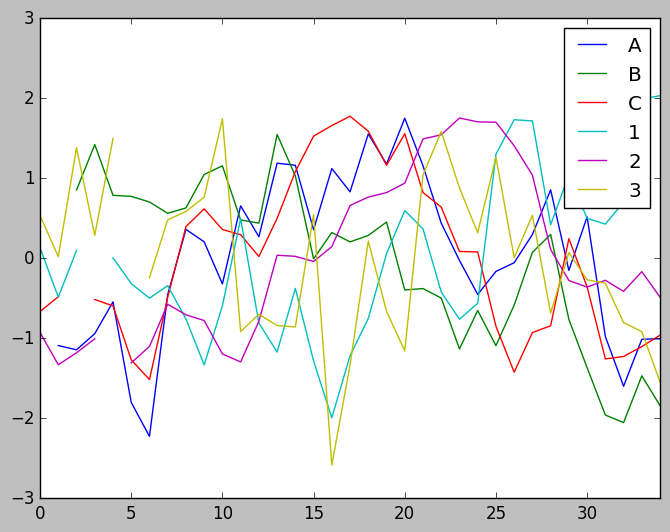

In [128]:
standarized_walk_df = standarized_walk_df.reset_index()
print standarized_walk_df
del standarized_walk_df['index'] # or df.drop('index', inplace=True, axis=1)

standarized_walk_df.plot()

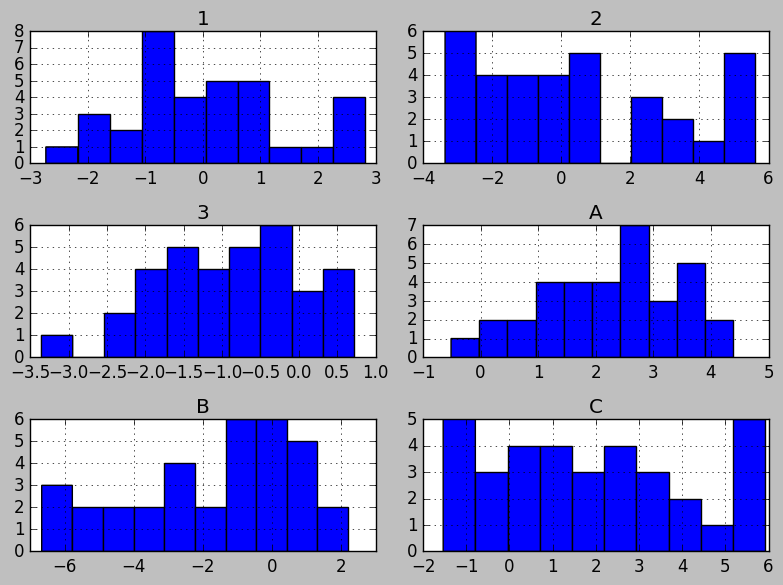

In [129]:
plt.figure()
random_walk_df.hist()
plt.tight_layout()

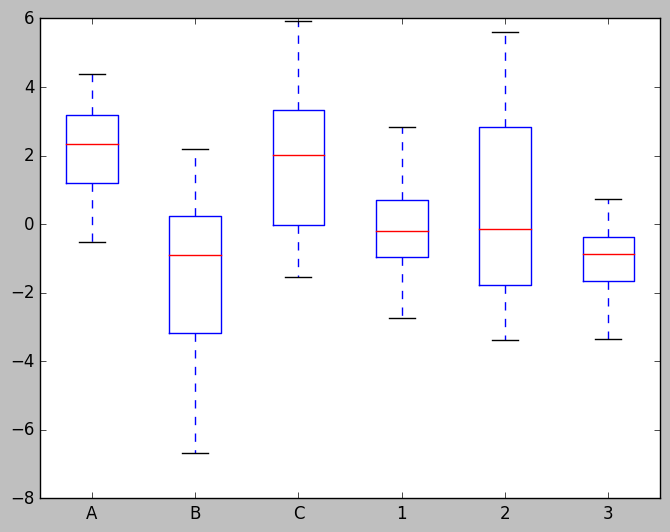

In [130]:
random_walk_df.plot(kind='box')

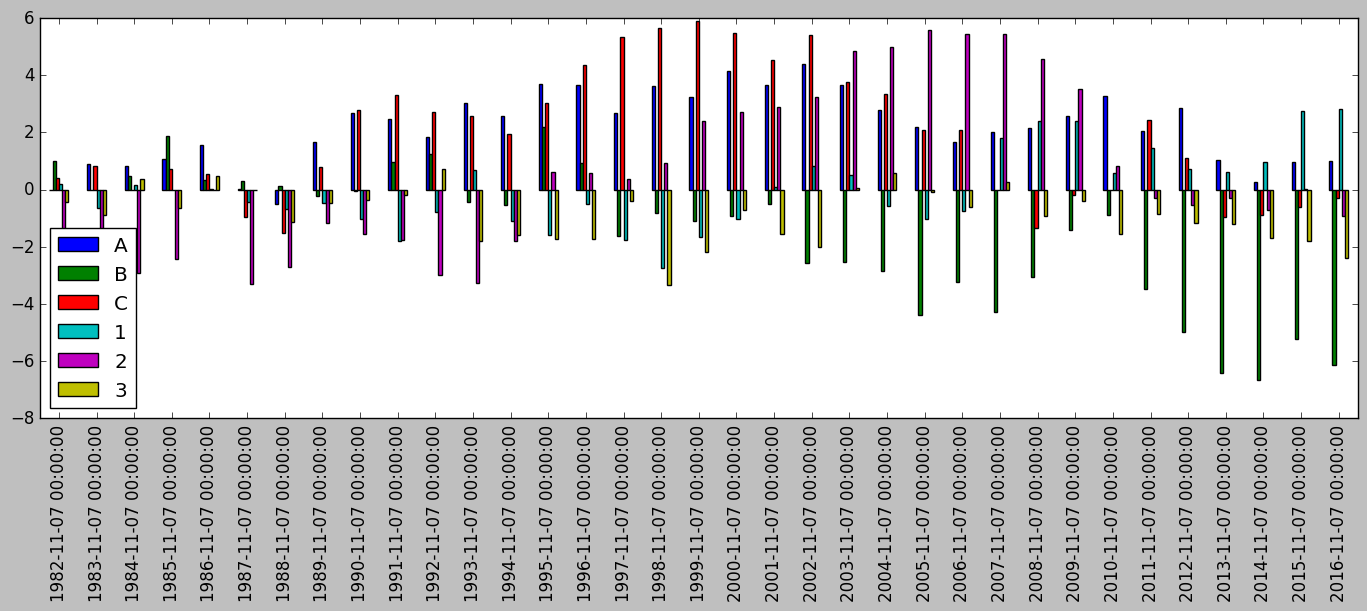

In [131]:
pylab.rcParams['figure.figsize']=(17,5)
random_walk_df.plot(kind='bar')
pylab.rcParams['figure.figsize']=(7,5)

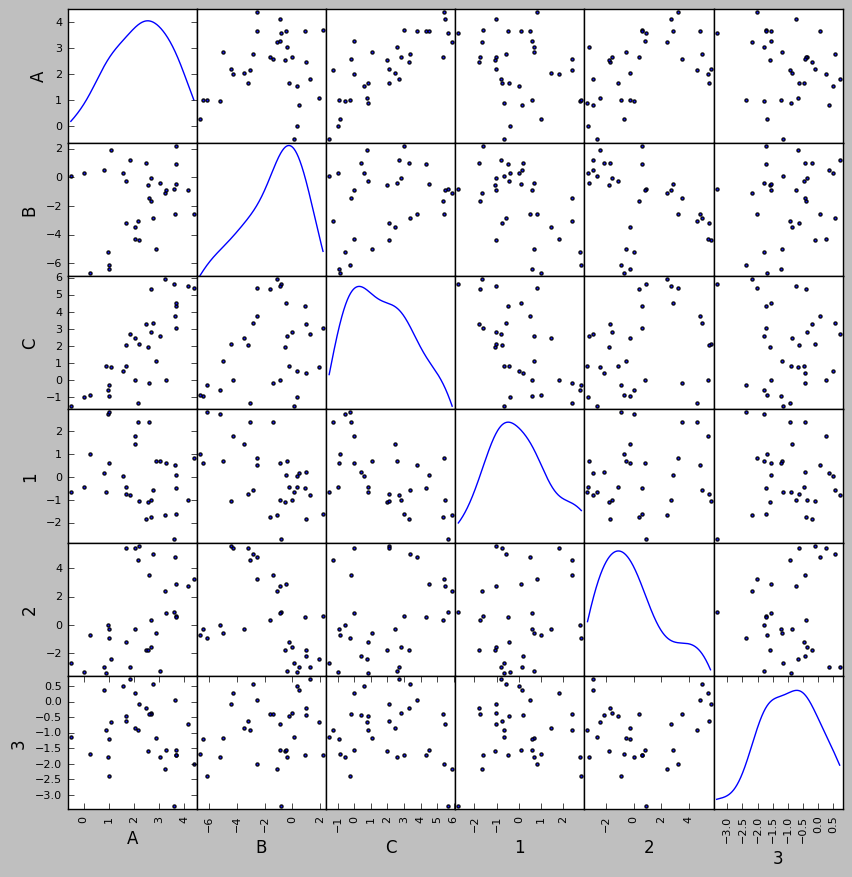

In [132]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(random_walk_df, alpha=0.9, figsize=(10, 10), diagonal='kde')
pylab.rcParams['figure.figsize']=(6,5)



# When will I ever even have to use Pandas? 

"Is it when I need a team of hardy animals to pull me across the expansive frozen tundra in a sled?"

<br>
# Answer: all the time.
So you might as well get good at it sooner rather than later... 

### Some other "Intro To Pandas" notebooks that I like a lot
* https://github.com/zipfian/DSI_Lectures/blob/master/pandas/sallamander/numpy_notes.ipynb
* https://github.com/zipfian/DSI_Lectures/blob/master/pandas/numpy_pandas.ipynb  
* http://pandas.pydata.org/pandas-docs/stable/10min.html

### The Official Documentation
* http://pandas.pydata.org/pandas-docs/stable/index.html

### An In-House Cheat Sheet
* https://github.com/zipfian/precourse/tree/master/Chapter_4_Pandas#functions-i-use-all-the-time